# RK3 Pre Project 

## Due 12/01/21

## Pre Project 

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt


#constants 
k = 48**(1/2)
gam = 0.7

c1 = 1./6
c2 = 2./6
c3 = 2./6
a2 = 1./2
a3 = 1./2
b21 = 1./2
b31 = 0.
b32 = 1./2


#Functions
fxy_x = lambda x,t,v: v
fx_lhs = "dx/dt"
fx_rhs = "v"


fxy_v = lambda x,t,v: -2*gam*v+(-k**2*x)
fv_lhs = "dv/dt"
fv_rhs = "-2*gam*v+(-k*x)"



# RK3 Orders t- independent      x - dependent
def rk3_fx(ti, xi, vi, dt):
    K1 = fxy_x(ti,xi,vi)
    K2 = fxy_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = fxy_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi) 
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt
    return xip1

def rk3_fv(ti, xi, vi, dt):
    K1 = fxy_v(ti,vi)
    K2 = fxy_v(ti+a2*dt,vi+b21*K1*dt)
    K3 = fxy_v(ti+a3*dt,vi+b31*K1*dt+b32*K2*dt) 
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt
    return vip1




# t seconds? 
a = 0.0    #initial value for t 
b = 5.0    #final value for t
x_TS = np.linspace(a,b)
F_TS = [(rk3_fx(0.2, 0 , 0,  5)+(2*gam*rk3_fx(0.2,0,0,5))+(k**2)*0) for num in x_TS] #x = ?, is this the f(x) expression 

n = 5     #number of x values
dt = (b-a)/(n-1)   #step size
x_rk3 = np.zeros(n)
v_rk3 = np.zeros(n)
iv = 2.0
v_rk3[0] = iv      #initial condition 
x_rk3[0] = a

for i in range(1,n):
    x_rk3_fx[i] = a + i*dt
    y_rk3_fx[i] = rk3_fx(x_rk3[i-1],y_rk3[i-1],ti, xi, vi, dt)

    
iv_lhs = f"y(x_0)"
iv_rhs = f"{str(iv)}"
iv_lhs_syms=sympy.latex(sympy.sympify(iv_lhs))
iv_rhs_syms=sympy.latex(sympy.sympify(iv_rhs))
    
fig = plt.figure(figsize=(6,6))
plt.plot(x_TS,y_TS,label="Exact Solution",color="b",linewidth="2.0")
plt.plot(x_rk4,y_rk4,label="Runge-Kutta 4",color="r",linestyle="--",linewidth="2.0")
plt.title(f"Exact solution of ${fxy_lhs_syms}={fxy_rhs_syms}$ subject to ${iv_lhs_syms}={iv_rhs_syms}$ for $x_0$={a} and RK2 with step size of {h:.3f}")
plt.text(0,2.3, f"$c_1$={c1:.2f}\n$c_2$={c2:.2f}\n$c_3$={c3:.2f}\n$c_4$={c4:.2f}\n$a_2$={a2:.2f}\n$a_3$={a3:.2f}\n$a_4$={a4:.2f}\n$b_{{21}}$={b21:.2f}\n$b_{{31}}$={b31:.2f}\n$b_{{32}}$={b32:.2f}\n$b_{{41}}$={b41:.2f}\n$b_{{42}}$={b42:.2f}\n$b_{{43}}$={b43:.2f}")
plt.legend()
plt.tight_la



NameError: name 'x_rk3_fx' is not defined

## Lemley In Class Example 

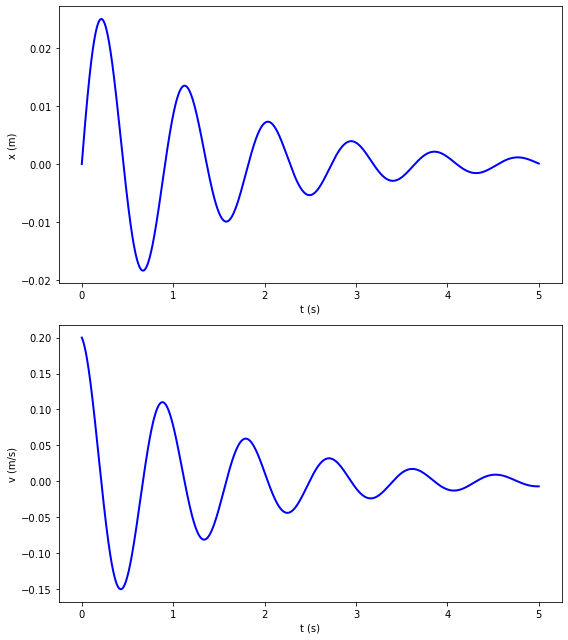

In [13]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

k = 48
gamma = .7

c1 = 1. /6
c2 = 4. /6
c3 = 1. /6
a2 = 1. /2
a3 = 1.
b21 = 1. /2
b31 = -1. 
b32 = 2. 

F_over_m = lambda t:0  #5*sin(2*pi*sqrt(k)*t)
fxy_x = lambda t,x,v: v #dx/dt = v t= independent, x = primiary dependent, v =dependent 
fxy_v = lambda t,x,v: F_over_m(t)-2*gamma*v-k*x   #dv/dt = -2*gamma*v-k*x    t = ind. v = prim dep. x = dep 

def rk3_x(ti, xi, vi, dt):
    K1 = fxy_x(ti,xi,vi)
    K2 = fxy_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = fxy_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi) 
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*dt 
    return xip1

def rk3_v(ti, xi, vi, dt):
    K1 = fxy_v(ti,xi,vi)
    K2 = fxy_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = fxy_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt) 
    vip1 = vi+(c1*K1+c2*K2+c3*K3)*dt # vi + 1
    return vip1


ti = 0.0    #initial value for t 
tf = 5.0    #final value for t
n = 5000


dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
xi = 0.0
vi = 0.2

t[0] = ti
x[0] = xi
v[0] = vi


for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk3_x(t[i-1],x[i-1],v[i-1], dt)
    v[i] = rk3_v(t[i-1],x[i-1],v[i-1], dt)
    
fig = plt.figure(figsize=(8,9))
ax1=plt.subplot(211)
plt.plot(t,x,label=" x vs. t ",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2=plt.subplot(212, sharex=ax1)
plt.plot(t,v,label=" v vs. t ",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()
